<h1 align="center"> CSE 242 Assignment 4, Fall 2021

<h2 align="center"> 2 Questions, 100 pts + 10 bonus pts, due: 23:59 pm, Nov 24th, 2021
    
    Your name: Nayan Sanjay Bhatia         Student ID: 1926648

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** Kernel Methods with Noisy Setting (Coding)
- **Task 2:** Image Classification with Scikit-learn (Coding)

# Question 1. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package (I used scikit-learn's svm.SVC class) to learn SVMs with a variety of parameter settings. 

## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [48]:
# Your code here
#generating +1 labels for training
accuracy_avg_svm=0
for i in range(50):

    mean_positive=[1,1]
    cov_positive=[[1,0],[0,1]]

    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    import warnings
    warnings.filterwarnings("ignore")

    x_train = np.random.multivariate_normal(mean_positive,cov_positive,1000)
    y_train=np.ones(x_train.shape[0])
    y_train=y_train.reshape(1000,1)


    mean_negative=[-1,-1]
    cov_negative=[[3,0],[0,3]]
    #generating -1 labels for training

    x_minus_train = np.random.multivariate_normal(mean_negative,cov_negative,1000)
    y_minus_train=np.full(x_minus_train.shape[0],-1)
    y_minus_train=y_minus_train.reshape(1000,1)
#     print(y_minus_train.shape,y_train.shape)


    #flipping +1 labels to -1
    y_train_copy=y_train.copy()
    for i in range(len(y_train)):
        if np.random.choice([-1,1],p=[0.35,0.65])==-1:
            y_train_copy[i]=-1
#     print(np.unique(y_train_copy,return_counts=True))


    #flipping -1 labels to 1
    y_minus_train_copy=y_minus_train.copy()
    for i in range(len(y_minus_train)):
        if np.random.choice([1,-1],p=[0.2,0.8])==1:
            y_minus_train_copy[i]=1
#     print(np.unique(y_minus_train_copy,return_counts=True))


    #fitting it on svm kernel with noisy sample data
    svm_noisy = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
    x_all_train=np.concatenate((x_train, x_minus_train), axis=0)
    y_all_train=np.concatenate((y_train_copy, y_minus_train_copy))


    svm_noisy.fit(x_all_train,y_all_train)


    # Your code here
    #generating +1 labels for testing
    mean_positive=[1,1]
    cov_positive=[[1,0],[0,1]]

    x_test = np.random.multivariate_normal(mean_positive,cov_positive,1000)
    y_test=np.ones(x_test.shape[0])
    y_test=y_test.reshape(1000,1)



    mean_negative=[-1,-1]
    cov_negative=[[3,0],[0,3]]
    #generating -1 labels for testing

    x_minus_test = np.random.multivariate_normal(mean_negative,cov_negative,1000)
    y_minus_test=np.full(x_minus_test.shape[0],-1)
    y_minus_test=y_minus_test.reshape(1000,1)
#     print(y_minus_test.shape,y_test.shape)



    x_all_test=np.concatenate((x_test, x_minus_test), axis=0)
    y_all_test=np.concatenate((y_test, y_minus_test))


    y_noisy_pred=svm_noisy.predict(x_all_test)
    accuracy_avg_svm+=accuracy_score(y_all_test, y_noisy_pred)*100
accuracy_avg_svm/=50
print(f"Accuracy for noisy data: {accuracy_avg_svm}")


Accuracy for noisy data: 80.955


In [49]:

    
np.random.choice([3,-3],p=[0.4,0.6])

3

In [50]:

# plt.plot(x_minus[0],x_minus[1],'x'); plt.axis('equal'); plt.show()

## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement? accuracy with noisy data: 81.28%. accuracy increased with knn to 85.2% 


In [51]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
best_knn_svm=0
best_k_svm=0

best_knn=0
best_k=0


for neighbor in range(1,100): #1000 took a lot of time
    
    knn_neigh = KNeighborsClassifier(n_neighbors=neighbor) #for loop 
    knn_neigh.fit(x_all_train,y_all_train)

    y_neigh_predict_test=knn_neigh.predict(x_all_test)
    if(accuracy_score(y_all_test, y_neigh_predict_test)*100>best_knn):
        best_knn=accuracy_score(y_all_test, y_neigh_predict_test)*100
        best_k=neighbor
#     print(f"Accuracy with just knn: {accuracy_score(y_all_test, y_neigh_predict_test)}")

    #train the model with the newly processed training dataset

    svm_knn = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)

    y_all_train_knn=knn_neigh.predict(x_all_train)
    svm_knn.fit(x_all_train,y_all_train_knn)

    y_svm_knn_predict_test=svm_knn.predict(x_all_test)
    
    if(accuracy_score(y_all_test, y_svm_knn_predict_test)*100>best_knn_svm):
        best_knn_svm=accuracy_score(y_all_test, y_svm_knn_predict_test)*100
        best_k_svm=neighbor
# print(f"Accuracy with knn+svm: {accuracy_score(y_all_test, y_svm_knn_predict_test)}")
# best_knn_svm/=100
print(f"Accuracy with knn+svm: {best_knn_svm}, k neighbours: {best_k_svm}")
print(f"Accuracy with just knn: {best_knn}, k neighbours: {best_k}")

Accuracy with knn+svm: 85.55, k neighbours: 7
Accuracy with just knn: 84.89999999999999, k neighbours: 79


## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement? No. Performance got decreased to 48.35%

In [53]:
# Your code here
from sklearn.cluster import KMeans
kmeans_cluster=KMeans(n_clusters=2,random_state=0).fit(x_all_train)
y_all_kmeans=kmeans_cluster.labels_
svm_kmeans=SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svm_kmeans.fit(x_all_train,y_all_kmeans)

y_svm_kmeans_predict_test=svm_kmeans.predict(x_all_test)
print(f"Accuracy with kmeans+svm: {accuracy_score(y_all_test, y_svm_kmeans_predict_test)*100}")

Accuracy with kmeans+svm: 48.0


# Question 2. (Binary Image Classification, 40 pts + 10 pts bonus)

In this question, you will perform a binary image classification task with scikit-learn implemented models. Your will see the improtance of a powerful feature extractor. Meanwhile, you will learn to perform hypyer-parameter tunning and select machine learning models with scikit-learn. Please **do not** use deep learning models for training use in this question.

#### Import/Install required packages (i.e., [Pillow](https://pillow.readthedocs.io/en/latest/installation.html))

In [1]:
# Import libraries
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Data preprocessing

In [2]:
# A help function which appends the path list for train and test image folder
def get_path(is_train=True):
    if is_train:
        directory = "train"
    else:
        directory = "test"

    # Append the image path to a list for imgaes that contain a hotdog    
    hot_dog_image_dir = f'./{directory}/hot_dog'
    hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in os.listdir(hot_dog_image_dir)]

    # Append the image path to a list for imgaes that don't contain a hotdog   
    not_hot_dog_image_dir = f'./{directory}/not_hot_dog'
    not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in os.listdir(not_hot_dog_image_dir)]

    img_paths = hot_dog_paths + not_hot_dog_paths
    
    # Return the unshuffled image paths
    return img_paths

In [3]:
# Show how many figures contained in the train and test dataset
print(f"There are {len(get_path())} train images and {len(get_path(is_train=False))} test images.")

There are 498 train images and 500 test images.


Take a look at a few randomly selected example images we will deal with.

[121, 19, 433, 65, 358, 188, 264, 48, 81, 468]


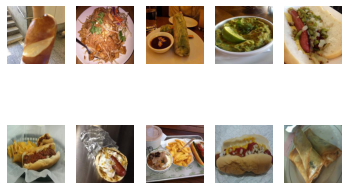

In [4]:
import random 

fig,ax = plt.subplots(2,5)
index_list = [random.randrange(1, len(get_path()), 1) for i in range(10)]
print(index_list)
train_paths = get_path()

filenames=[train_paths[idx] for idx in index_list] 
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
        ax[i%2][i//2].axis('off')
fig.show()

#### The images may have different shape/size.

In [5]:
# See the shape of an image
sample_img = Image.open(train_paths[1])
print(np.array(sample_img).shape)

(200, 200, 3)


#### Standard PCA methods implemented in Scikit-learn do not work for color imgaes (RGB), so we will transform the images into greyscale.

In [6]:
import matplotlib

# Transform color images to greyscale
def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

# Given the image path, return the resized image as an numpy 2d array
def get_image(path):
    img = Image.open(path)
    img = img.resize((200,200))
    img.save(path)
    img = matplotlib.image.imread(path)
    gray = rgb2gray(img)  
    return np.array(gray)

In [7]:
print(get_image(train_paths[1]).shape)

(200, 200)


#### Append image data and labels in to list

In [8]:
# Prepare the raw data: geryscale, train images and train labels
h, w = get_image(train_paths[1]).shape
train_data = np.empty((len(train_paths), h, w))
train_label = [1] * np.int(len(train_paths)/2) + [0] * np.int(len(train_paths)/2)
count = -1
for pth in train_paths:
    count += 1
    image = get_image(pth)
    train_data[count] = image
n_samples = train_data.shape[0]
X = np.empty((n_samples, h * w))
for i in range(n_samples):
    X[i] = train_data[i].flatten()
y = train_label
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


#### Prepare the raw test data

In [9]:
test_paths = get_path(is_train=False)


# Prepare the raw dataframe: geryscale, test images and test labels
test_data = np.empty((len(test_paths), h, w))
test_label = [1] * np.int(len(test_paths)/2) + [0] * np.int(len(test_paths)/2)
count = -1
for pth in test_paths:
    count += 1
    image = get_image(pth)
    test_data[count] = image
X_test = np.empty((len(test_paths), h * w))
for i in range(n_samples):
    X_test[i] = test_data[i].flatten()
y_test = test_label
print(f"The shape of the test data is {X_test.shape}")

The shape of the test data is (500, 40000)


#### Shuffle the training dataset

In [10]:
# Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X, y, random_state=0)
X_train
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


In [11]:
# Import additional libaries
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Question 2.1 Reducing the dimensions (feature extraction) -- 15 pts

In this question, you will need to use a dimensionality reduction (feature extraction) method to project both <code>X_train</code> and <code>X_test</code> on a lower dimensions. Otherwise, training directly on the raw images will consume you a long time.

(0.0, 5.0)

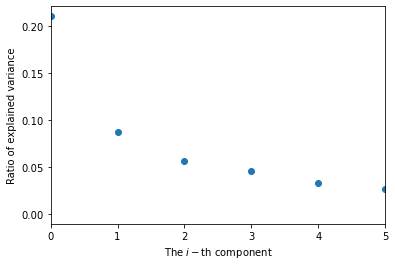

In [21]:
# Your code here

from sklearn.decomposition import PCA
explainedratio=PCA().fit(X).explained_variance_ratio_
# print(explainedratio)

plt.xlabel('The $i-$th component')
plt.ylabel('Ratio of explained variance')
i_component=[i for i in range(X.shape[0])]
plt.scatter(i_component, explainedratio)
plt.xlim([0, 5]) #therefore we take n-component as 2




In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scale_train=scale.fit_transform(X_train)
X_scale_test=scale.fit_transform(X_test)
projected_X_train = PCA(n_components=2).fit_transform(X_scale_train)
projected_X_test=PCA(n_components=2).fit_transform(X_scale_test)


## Question 2.2 Binary Image Classification -- 15 pts

In this question, you will need to find the most suitable machine learning models (as well as hyper-parameters) implemented in <code>Scikit-learn</code>, for example, fit on the projected training data and labels, then predict on the projected test data. The accuracy score determines the accuracy your model prediction.

**Hint:** here are some links for implemented machine learning models in Scikit-learn.

- SVM: [link](https://scikit-learn.org/stable/modules/svm.html)

- Gaussian Naive Bayes: [link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

- A toy example about classifier comparisons: [link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

- If you are unsure about hyperparameter selection, you may find [grid-search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search) helpful.

- To achieve a high accuracy score, simply adopting PCA for feature extraction may not work. You may need to find some advanced feature extractor to reach a much better performance, i.e., >80%.


In [17]:
from sklearn.naive_bayes import GaussianNB
naive_gaussian=GaussianNB(priors=None,var_smoothing=1e-09)

scale=StandardScaler()
X_scale_train=scale.fit_transform(X_train)
X_scale_test=scale.fit_transform(X_test)
projected_X_train = PCA(n_components=3).fit_transform(X_scale_train)
projected_X_test=PCA(n_components=3).fit_transform(X_scale_test)


naive_gaussian.fit(projected_X_train, y_train)
# print(X_test.shape,projected)
y_pred=naive_gaussian.predict(projected_X_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 60.4% accurate


In [20]:
from sklearn.naive_bayes import GaussianNB
best_acc=0
best_n_component=0
for i in range(2,100):
    naive_gaussian=GaussianNB(priors=None,var_smoothing=1e-09)

    scale=StandardScaler()
    X_scale_train=scale.fit_transform(X_train)
    X_scale_test=scale.fit_transform(X_test)
    projected_X_train = PCA(n_components=i).fit_transform(X_scale_train)
    projected_X_test=PCA(n_components=i).fit_transform(X_scale_test)


    naive_gaussian.fit(projected_X_train, y_train)
    # print(X_test.shape,projected)
    y_pred=naive_gaussian.predict(projected_X_test)
    if(accuracy_score(y_pred,y_test)*100>best_acc):
        best_acc=accuracy_score(y_pred,y_test)*100
        best_n_component=i
print(f"The model is {best_acc}% accurate for n_component={best_n_component}")

The model is 61.0% accurate for n_component=77


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# h = 0.02  # step size in the mesh

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0),
#     make_circles(noise=0.2, factor=0.5, random_state=1),
#     linearly_separable,
# ]

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(datasets):
#     # preprocess dataset, split into training and test part

#     X_train, X_test, y_train, y_test = projected_X_train,projected_X_test,y_train,y_test

#     x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
# #         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
#             score,
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# h = 0.02  # step size in the mesh

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0),
#     make_circles(noise=0.2, factor=0.5, random_state=1),
#     linearly_separable,
# ]

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(datasets):
#     # preprocess dataset, split into training and test part

#     X_train, X_test, y_train, y_test = X_train,X_test,y_train,y_test

#     x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
# #             ("%.2f" % score).lstrip("0"),
#             score,
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=svm.SVC(probability=True)
# model=GridSearchCV(svc,param_grid)
# # X_train, X_test, y_train, y_test = X_train,X_test,y_train,y_test
# x_train,x_test,y_train,y_test=X_train,X_test,y_train,y_test

# model.fit(x_train,y_train)

# y_pred=model.predict(x_test)
# print("The predicted Data is :")
# print(y_pred)
# print("The actual data is:")
# print(np.array(y_test))
# print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
# # model.best_params_ contains the best parameters obtained from GridSearchCV

In [ ]:
# `


## Leaderboard

Depending on your best achieved accuracy score, the remaining points and bonus points are organized as below:

- **Accuracy score > 98%:** 10 pts + **10 bonus pts**

- **Accuracy score 96-98%:** 10 pts + **8 bonus pts**

- **Accuracy score 94-96%:** 10 pts + **6 bonus pts**

- **Accuracy score 92-94%:** 10 pts + **4 bonus pts**

- **Accuracy score 90-92%:** 10 pts + **2 bonus pts**

- **Accuracy score 80-90%:** 10 pts

- **Accuracy score 70-80%:** 8 pts

- **Accuracy score 61-70%:** 6 pts

- **Accuracy score 58-61%:** 4 pts

- **Accuracy score 55-58%:** 2 pts

- **Accuracy score < 55%:** 0 pts 
